# Preparación de Datos

In [44]:
# Importar librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso

In [60]:
datos = pd.read_csv('data_vulcar.csv')
datos.head()

,municipio,vul_car_pob,NOM_MUN,NOM_LOC,PCON_LIMI,PHOG_IND,P5_HLI_NHE,PCON_DISC,VPH_PISODT,VPH_S_ELEC
0,Aguascalientes,"257,144",Aguascalientes,Total del Municipio,116705.0,4050.0,8.0,47525.0,264662.0,438.0
1,Asientos,"19,243",Asientos,Total del Municipio,4551.0,43.0,0.0,2886.0,12330.0,95.0
2,Calvillo,"21,199",Calvillo,Total del Municipio,6760.0,173.0,1.0,4088.0,15336.0,112.0
3,Cosío,"5,138",Cosío,Total del Municipio,1933.0,15.0,0.0,805.0,3891.0,25.0
4,Jesús María,"42,186",Jesús María,Total del Municipio,11904.0,395.0,1.0,5036.0,32719.0,155.0


In [61]:
datos.columns

Index(['municipio', 'vul_car_pob', 'NOM_MUN', 'NOM_LOC', 'PCON_LIMI',
       'PHOG_IND', 'P5_HLI_NHE', 'PCON_DISC', 'VPH_PISODT', 'VPH_S_ELEC'],
      dtype='object')

In [62]:
# Eliminar columnas no numéricas

datos.drop(columns='municipio', inplace=True)
datos.drop(columns='NOM_MUN', inplace=True)
datos.drop(columns='NOM_LOC', inplace=True)

In [63]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vul_car_pob  2469 non-null   object 
 1   PCON_LIMI    2440 non-null   float64
 2   PHOG_IND     2440 non-null   float64
 3   P5_HLI_NHE   2440 non-null   float64
 4   PCON_DISC    2440 non-null   float64
 5   VPH_PISODT   2440 non-null   float64
 6   VPH_S_ELEC   2440 non-null   float64
dtypes: float64(6), object(1)
memory usage: 135.2+ KB


In [64]:
# Reemplaza 'n.d' con NaN en e imputar datos
datos.replace('n.d', np.nan, inplace=True)
datos['vul_car_pob'] = datos['vul_car_pob'].str.replace(',', '').astype(float)
datos.fillna(datos.median(), inplace=True)

In [65]:
# Asegurar que los datos sean float
datos = datos.astype(float)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vul_car_pob  2469 non-null   float64
 1   PCON_LIMI    2469 non-null   float64
 2   PHOG_IND     2469 non-null   float64
 3   P5_HLI_NHE   2469 non-null   float64
 4   PCON_DISC    2469 non-null   float64
 5   VPH_PISODT   2469 non-null   float64
 6   VPH_S_ELEC   2469 non-null   float64
dtypes: float64(7)
memory usage: 135.2 KB


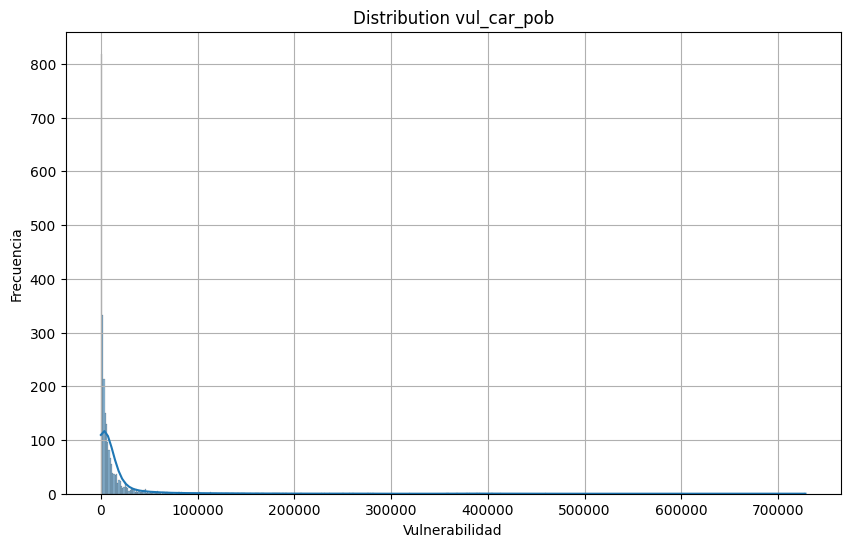

In [67]:
# Plot the distribution of 'vul_car_pob'
plt.figure(figsize=(10, 6))
sns.histplot(datos['vul_car_pob'], kde=True)
plt.title('Distribution vul_car_pob')
plt.xlabel('Vulnerabilidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [57]:

# Calculate the IQR
Q1 = datos['vul_car_pob'].quantile(0.25)
Q3 = datos['vul_car_pob'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
datos = datos[(datos['vul_car_pob'] >= lower_bound) & (datos['vul_car_pob'] <= upper_bound)]

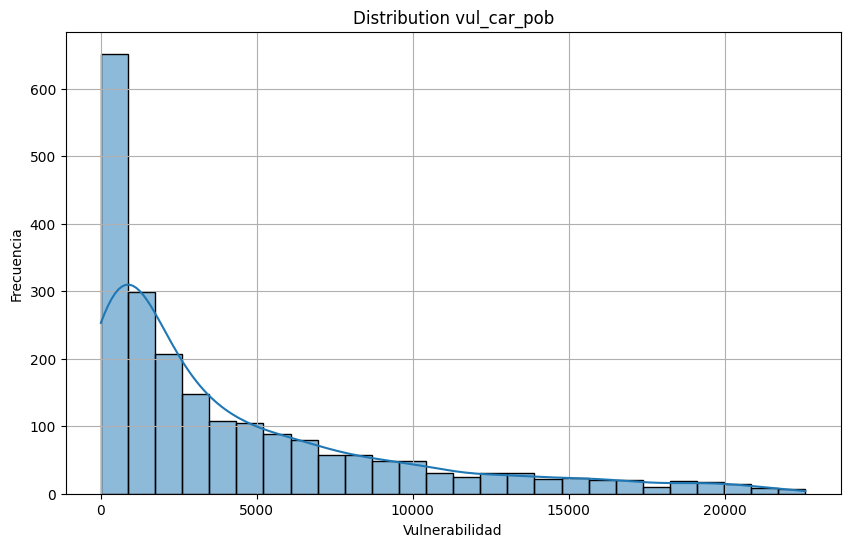

In [59]:
# Plot the distribution of 'vul_car_pob'
plt.figure(figsize=(10, 6))
sns.histplot(datos['vul_car_pob'], kde=True)
plt.title('Distribution vul_car_pob')
plt.xlabel('Vulnerabilidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [20]:
# Separar las variables predictoras (X) y la variable objetivo (y)
columnas_utilizar = datos.columns[:10]
X = datos[columnas_utilizar].drop(columns=["vul_car_pob"])
y = datos["vul_car_pob"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo SVR

In [39]:
import matplotlib.pyplot as plt

# Definir el modelo SVR
modelo = SVR()

# Definir la grilla de hiperparámetros para GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Tipos de kernel
    'C': [0.1, 1, 10, 100],              # Parámetro de regularización
    'epsilon': [0.01, 0.1, 0.5, 1],      # Margen de error en SVR
    'gamma': ['scale', 'auto']           # Coeficiente del kernel (solo para 'rbf' y 'poly')
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Métrica de evaluación (MSE negativo)
    cv=5,                             # Número de folds en la validación cruzada
    verbose=1,                        # Nivel de verbosidad (1 para ver progreso)
    n_jobs=-1                         # Usar todos los núcleos del CPU
)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
mejores_hiperparametros = grid_search.best_params_
print(f"Mejores hiperparámetros: {mejores_hiperparametros}")

# Obtener el mejor modelo
mejor_modelo = grid_search.best_estimator_

# Predecir con el mejor modelo
y_pred = mejor_modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print('R^2: ', r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Mejores hiperparámetros: {'C': 100, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Error Cuadrático Medio (MSE): 4164094.454107731
R^2:  0.8134392619895583
MAE: 1227.4955993561969
RMSE:  2040.6112942223297


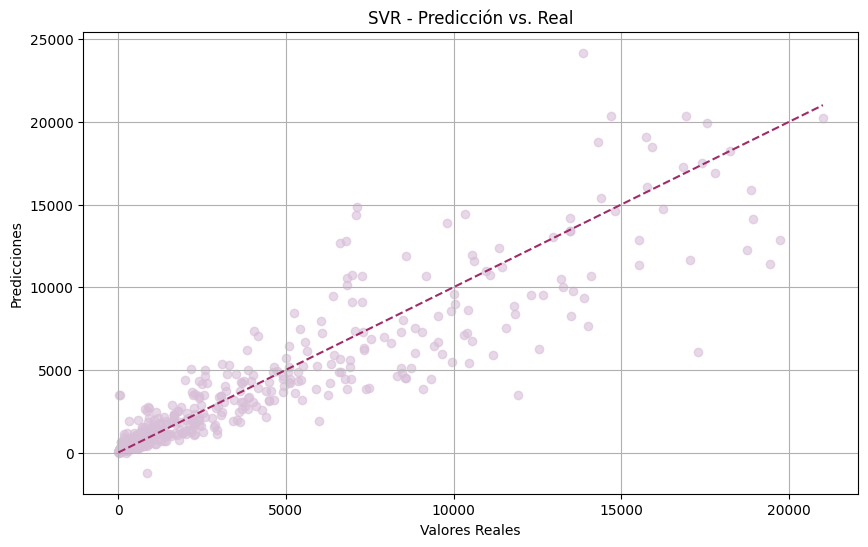

In [40]:
# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones", color='#D8BFD8')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#9F2B68', linestyle='--', label="Línea ideal (y=x)")
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('SVR - Predicción vs. Real')
plt.grid(True)
plt.show()

In [43]:
#SVR SIN HP

modelo = SVR()
modelo.fit(X_train, y_train)

# Predecir con el modelo entrenado
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print('R^2: ', r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Error Cuadrático Medio (MSE): 23757949.54346813
R^2:  -0.06440923694032574
MAE: 3215.7378317055172
RMSE:  4874.212710117207


# Regresión LASSO

In [68]:
# Definir el modelo base
modelo_lasso = Lasso()

# Definir los valores de alpha a probar
param_grid = {'alpha': np.logspace(-4, 1, 50)}  # Valores entre 0.0001 y 10

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(modelo_lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_lasso = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred = best_lasso.predict(X_test)

# Evaluar el modelo
print("Mejor alpha:", grid_search.best_params_['alpha'])
print("R^2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Mejor alpha: 6.250551925273976
R^2: 0.8163347217199957
MSE: 4099466.8806204754
MAE: 1286.1562968488806
RMSE: 2024.7140244045518


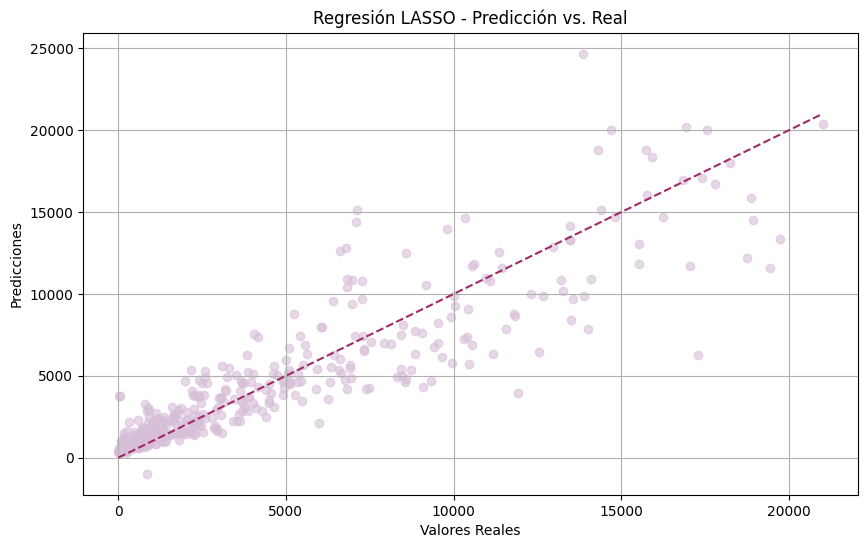

In [69]:
# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones", color='#D8BFD8')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#9F2B68', linestyle='--', label="Línea ideal (y=x)")
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión LASSO - Predicción vs. Real')
plt.grid(True)
plt.show()